In [5]:
import os
import sys

root_dir = "NYU_DL_Sys_Project"
cur_dir = os.getcwd().split("/")[-1]
while cur_dir != root_dir:
    os.chdir("..")
    cur_dir = os.getcwd().split("/")[-1]

In [6]:
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("xiang-pan/NYU_DL_Sys_Project")
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # run.config is the input metrics.
    # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       

import pandas as pd 
summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

all_df.to_csv("project.csv")

# get baseline

In [17]:
d = {}
time_d = {}
for backbone in ["baseline", "task", "domain", "task-domain"]:
    for method in ["random", "lc", "entropy", "margin"]:
        d[backbone + "_" + method] = [-1 for i in range(5)]
        time_d[backbone + "_" + method] = [-1 for i in range(5)]
for i in all_df.iterrows():
    # name = i[0]
    # print(i)
    name = i[1]['name']
    # print(name)
    if "deepset/roberta-base-squad2-covid" in name:
        name = name.replace("deepset/roberta-base-squad2-covid", "task-domain")
    elif "vinai/bertweet-covid19-base-cased" in name:
        name = name.replace("vinai/bertweet-covid19-base-cased", "domain")
    elif "deepset/roberta-base-squad2" in name:
        name = name.replace("deepset/roberta-base-squad2", "task")
    else:
        name = name.replace("roberta-base", "baseline")
    print(name)
    backbone = name.split("/")[0].split("_")[0]
    # print(backbone)
    iteration = int(name.split("_")[-1])
    method = name.split("/")[0].split("_")[1]
    log_name = backbone + "_" + method
    test_f1 = i[1]['test/f1']
    # round to 2 decimal places
    test_f1 = round(test_f1, 2)
    print(log_name, test_f1)
    # print(i[1])
    time = i[1]['_runtime']

    d[log_name][iteration] = test_f1
    time_d[log_name][iteration] = time

task-domain_lc_4
task-domain_lc 0.86
domain_entropy_4
domain_entropy 0.59
task-domain_entropy_4
task-domain_entropy 0.84
domain_lc_4
domain_lc 0.53
task_entropy_4
task_entropy 0.87
task-domain_margin_4
task-domain_margin 0.82
task-domain_random_4
task-domain_random 0.88
domain_margin_4
domain_margin 0.51
domain_random_4
domain_random 0.57
task_lc_4
task_lc 0.86
task_random_4
task_random 0.87
task_margin_4
task_margin 0.87
baseline_lc_4
baseline_lc 0.86
baseline_margin_4
baseline_margin 0.84
baseline_random_4
baseline_random 0.86
baseline_entropy_4
baseline_entropy 0.87
task-domain_margin_3
task-domain_margin 0.86
task-domain_entropy_3
task-domain_entropy 0.83
task-domain_lc_3
task-domain_lc 0.86
domain_entropy_3
domain_entropy 0.5
domain_lc_3
domain_lc 0.51
domain_margin_3
domain_margin 0.49
task-domain_random_3
task-domain_random 0.86
task_entropy_3
task_entropy 0.85
domain_random_3
domain_random 0.47
task_lc_3
task_lc 0.8
task_margin_3
task_margin 0.89
task_random_3
task_random 0.86


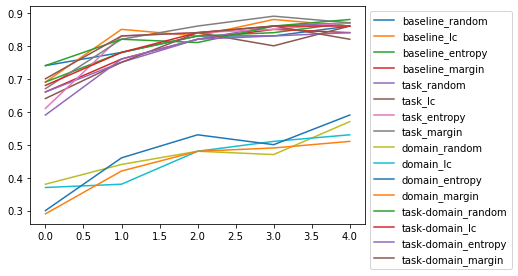

In [8]:
# plot the figure
import matplotlib.pyplot as plt
for k, v in d.items():
    plt.plot(v, label=k)
    plt.legend(bbox_to_anchor=(1, 1, 0, 0) ,loc='best')

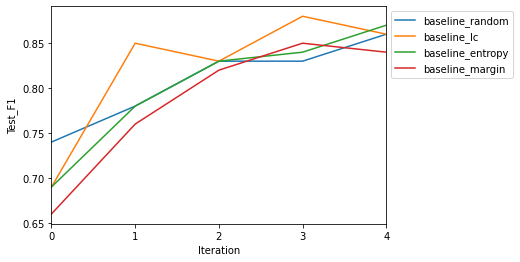

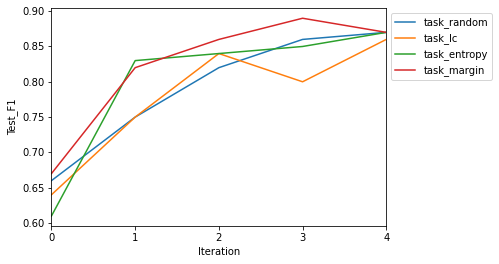

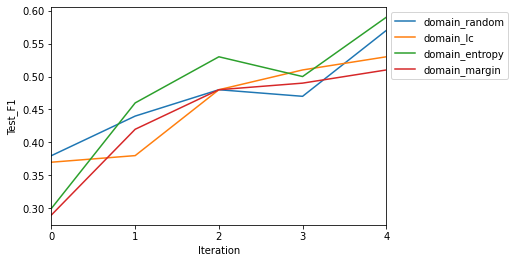

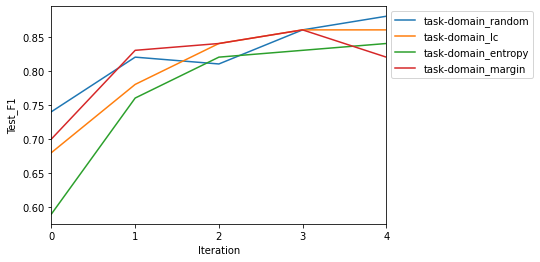

In [11]:
# plot the figure
for backbone in ["baseline", "task", "domain", "task-domain"]:
    import matplotlib.pyplot as plt
    plt.figure()
    for k, v in d.items():
        if k.split("_")[0] == backbone:
            plt.plot(v, label=k)
            plt.legend(bbox_to_anchor=(1, 1, 0, 0) ,loc='best')
    plt.xlabel("Iteration")
    plt.ylabel("Test_F1")
    plt.xlim(0, 4,)
    plt.xticks(range(5))
    plt.savefig(f"figures/{backbone}.png", bbox_inches='tight')

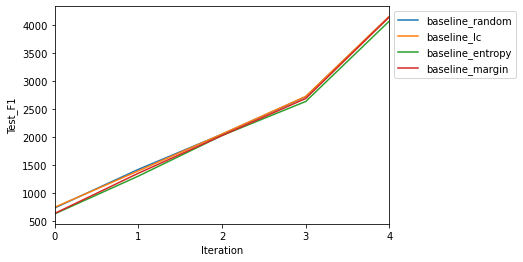

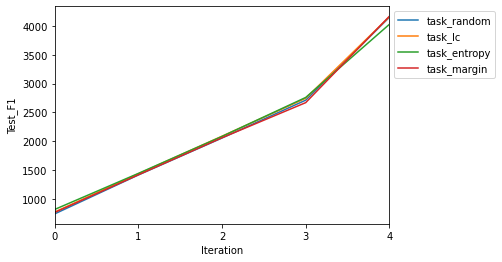

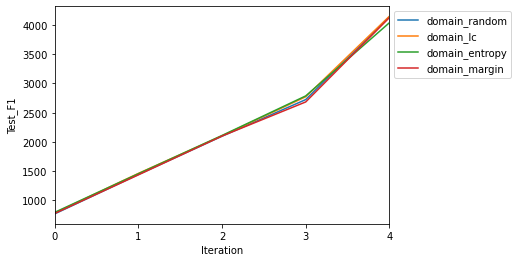

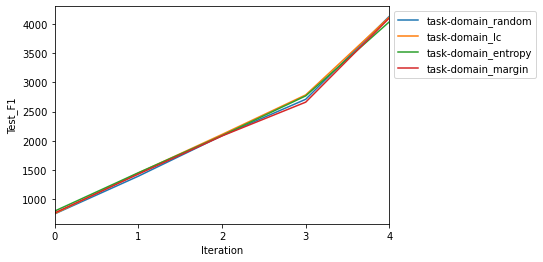

In [18]:
# plot the figure
for backbone in ["baseline", "task", "domain", "task-domain"]:
    import matplotlib.pyplot as plt
    plt.figure()
    for k, v in time_d.items():
        if k.split("_")[0] == backbone:
            plt.plot(v, label=k)
            plt.legend(bbox_to_anchor=(1, 1, 0, 0) ,loc='best')
    plt.xlabel("Iteration")
    plt.ylabel("Test_F1")
    plt.xlim(0, 4,)
    plt.xticks(range(5))
    plt.savefig(f"figures/{backbone}_time.png", bbox_inches='tight')